# randomized lasso on voytek groups

PSD slope as a predictor of age seems to break down as you move further into old age -- higher than what Voytek tested. Let's select relevant channels from looking at younger vs MCI controls and then see if these retain significance as we look at differences between older adult groups.

In [57]:
%matplotlib inline
import os
import glob
import seaborn
import numpy as np
import scipy as sp
import pandas as pd
import scipy.io
import numpy.fft
import scipy.signal
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model, cross_validation
mpl.rcParams['figure.figsize'] = (16, 10)

In [65]:
df = pd.read_csv('../data/pipeline-full/ya-oa-full-linreg-02-24-eyesc-eyeso-sep.csv')

cols = list(data.columns.values)
cols.remove('SUBJECT')
cols.remove('CLASS')
cols.remove('AGE')
cols.remove('SEX')

data = df[df['CLASS'].isin(['DANE', 'MCI_Control'])]
dane = df[df['CLASS'].isin(['DANE'])]
mci_control = df[df['CLASS'].isin(['MCI_Control'])]
####
mci_cohort   = df[df['CLASS'].isin(['MCI', 'MCI_Control'])]                
sa_cohort    = df[df['CLASS'].isin(['SA', 'SA_Control'])]
sa_control   = df[df['CLASS'].isin(['SA_Control'])]
older_adults = df[df['CLASS'].isin(['MCI', 'MCI_Control', 'SA_Control'])]  
controls     = df[df['CLASS'].isin(['DANE', 'SA_Control', 'MCI_Control'])] 
sa           = df[df['CLASS'].isin(['SA'])]                                
mci          = df[df['CLASS'].isin(['MCI'])]   

X = data[cols]
y = data.AGE

In [44]:
pred_train, pred_test, tar_train, tar_test = cross_validation.train_test_split(X, y,
                                                              test_size=.3, random_state=123)

model = linear_model.LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [45]:
# Nicely prints coefficients of linear models [0].
# [0]: http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
def prettyprint(coefs, names=None, sort=False, n_coefs=20):
#     if names == None:
#         names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + \n".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [46]:
print(prettyprint(model.coef_, X.columns, sort=True))

2.574 * B5_EYESO + 
1.622 * A27_EYESO + 
0.504 * A10_EYESC + 
0.086 * A31_EYESO + 
0.079 * FRONTAL_EYESO + 
0.0 * AVG_OA_PSD_EYESC + 
0.0 * AVG_OA_PSD_EYESO + 
0.0 * AVG_YA_PSD_EYESC + 
0.0 * AVG_YA_PSD_EYESO + 
0.0 * AVG_PSD_EYESC + 
0.0 * A1_EYESC + 
0.0 * A2_EYESC + 
0.0 * A3_EYESC + 
0.0 * A4_EYESC + 
0.0 * A5_EYESC + 
0.0 * A6_EYESC + 
0.0 * A7_EYESC + 
0.0 * A8_EYESC + 
0.0 * A11_EYESC + 
0.0 * A12_EYESC + 
0.0 * A13_EYESC + 
0.0 * A14_EYESC + 
0.0 * A15_EYESC + 
0.0 * A16_EYESC + 
0.0 * A17_EYESC + 
0.0 * A18_EYESC + 
0.0 * A21_EYESC + 
0.0 * A22_EYESC + 
0.0 * A23_EYESC + 
0.0 * A24_EYESC + 
0.0 * A25_EYESC + 
0.0 * A26_EYESC + 
0.0 * A27_EYESC + 
0.0 * A29_EYESC + 
0.0 * A30_EYESC + 
0.0 * A31_EYESC + 
0.0 * B1_EYESC + 
0.0 * B2_EYESC + 
0.0 * B3_EYESC + 
0.0 * B4_EYESC + 
0.0 * B5_EYESC + 
0.0 * B6_EYESC + 
0.0 * B8_EYESC + 
0.0 * B9_EYESC + 
0.0 * B10_EYESC + 
0.0 * B11_EYESC + 
0.0 * B12_EYESC + 
0.0 * B13_EYESC + 
0.0 * B14_EYESC + 
0.0 * B17_EYESC + 
0.0 * B18_EYESC + 
0.

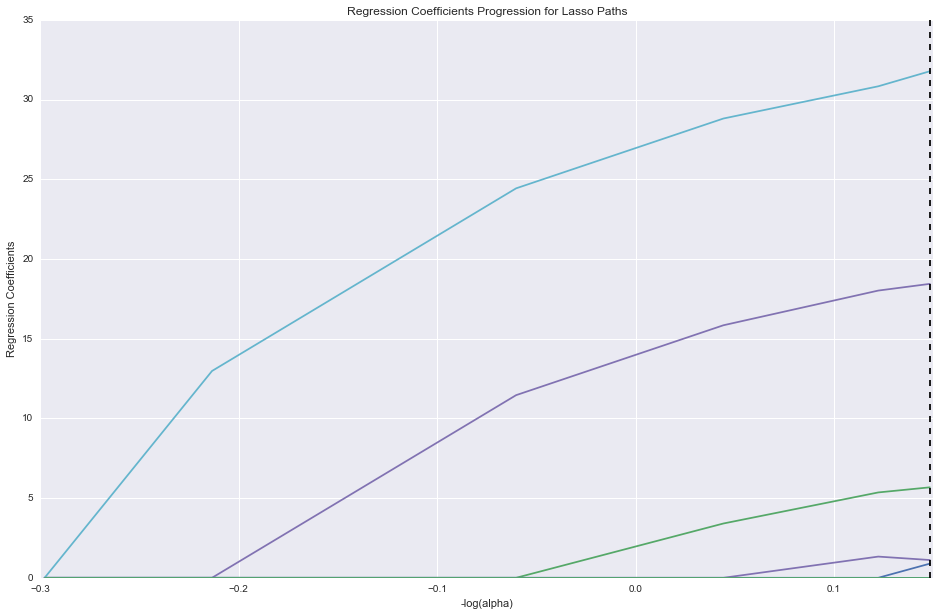

In [47]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

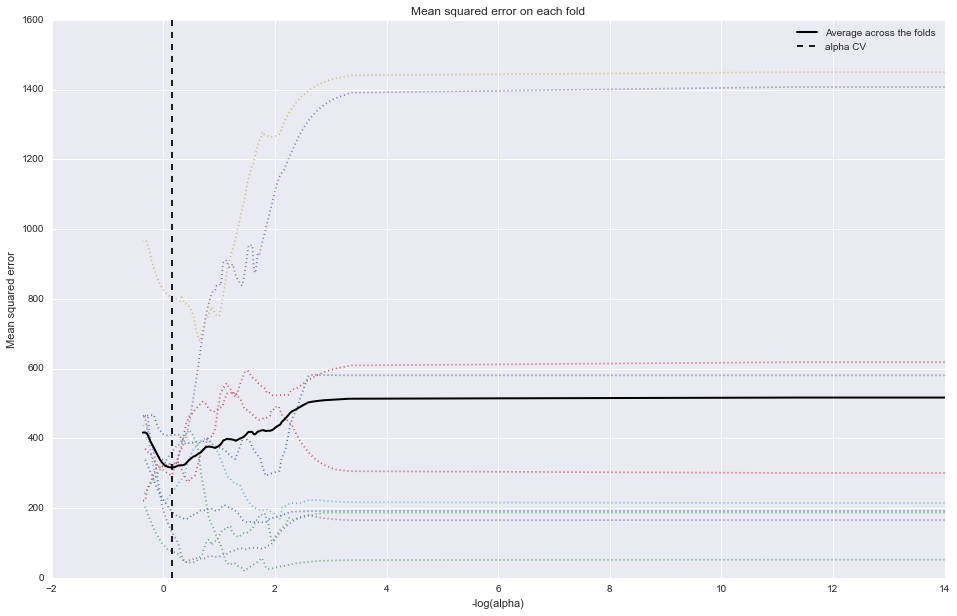

In [48]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [49]:
skf = cross_validation.StratifiedKFold(data.AGE)
model = linear_model.LassoLarsCV(cv=skf, precompute=False).fit(X, y)

/Users/jorge/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [50]:
print(prettyprint(model.coef_, X.columns, sort=True))

1.827 * FRONTAL_EYESO + 
1.182 * AVG_PSD_EYESO + 
0.0 * AVG_OA_PSD_EYESC + 
0.0 * AVG_OA_PSD_EYESO + 
0.0 * AVG_YA_PSD_EYESC + 
0.0 * AVG_YA_PSD_EYESO + 
0.0 * AVG_PSD_EYESC + 
0.0 * A1_EYESC + 
0.0 * A2_EYESC + 
0.0 * A3_EYESC + 
0.0 * A4_EYESC + 
0.0 * A5_EYESC + 
0.0 * A6_EYESC + 
0.0 * A7_EYESC + 
0.0 * A8_EYESC + 
0.0 * A10_EYESC + 
0.0 * A11_EYESC + 
0.0 * A12_EYESC + 
0.0 * A13_EYESC + 
0.0 * A14_EYESC + 
0.0 * A15_EYESC + 
0.0 * A16_EYESC + 
0.0 * A17_EYESC + 
0.0 * A18_EYESC + 
0.0 * A21_EYESC + 
0.0 * A22_EYESC + 
0.0 * A23_EYESC + 
0.0 * A24_EYESC + 
0.0 * A25_EYESC + 
0.0 * A26_EYESC + 
0.0 * A27_EYESC + 
0.0 * A29_EYESC + 
0.0 * A30_EYESC + 
0.0 * A31_EYESC + 
0.0 * B1_EYESC + 
0.0 * B2_EYESC + 
0.0 * B3_EYESC + 
0.0 * B4_EYESC + 
0.0 * B5_EYESC + 
0.0 * B6_EYESC + 
0.0 * B8_EYESC + 
0.0 * B9_EYESC + 
0.0 * B10_EYESC + 
0.0 * B11_EYESC + 
0.0 * B12_EYESC + 
0.0 * B13_EYESC + 
0.0 * B14_EYESC + 
0.0 * B17_EYESC + 
0.0 * B18_EYESC + 
0.0 * B19_EYESC + 
0.0 * B20_EYESC + 
0.0

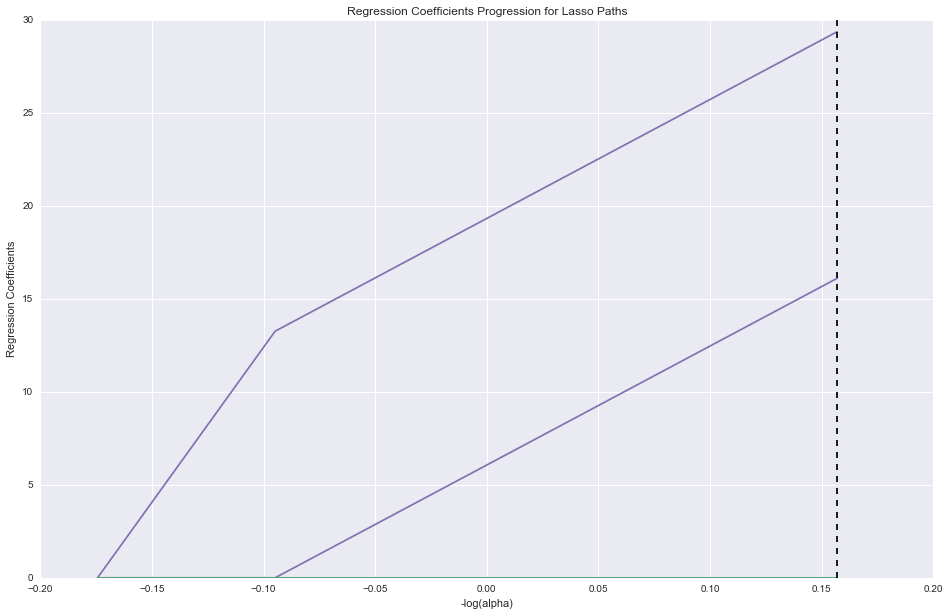

In [82]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
# m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

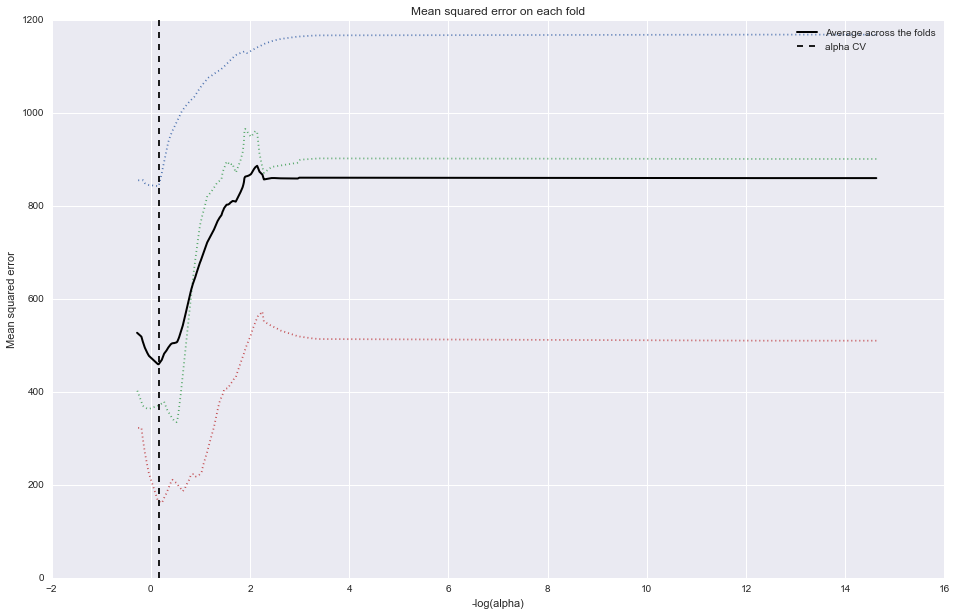

In [52]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

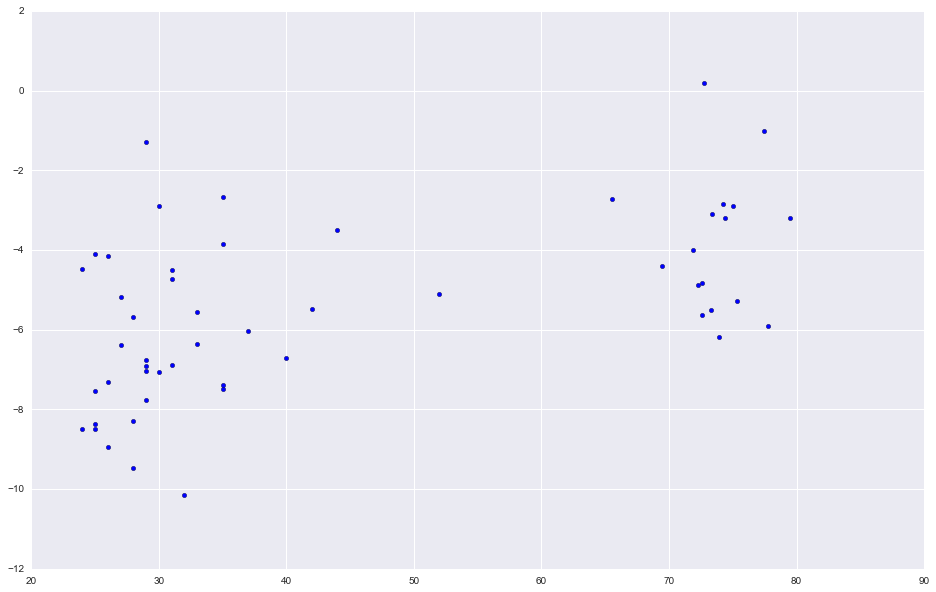

In [53]:
line = 
plt.scatter(data.AGE, data.FRONTAL_EYESO)


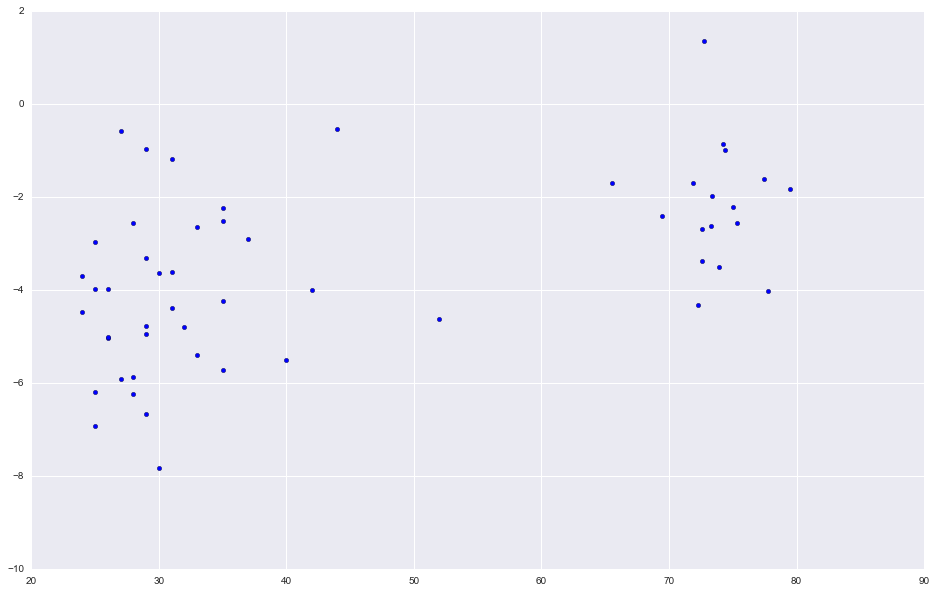

In [54]:
plt.scatter(data.AGE, data.AVG_PSD_EYESO)

In [59]:
result = stats.ttest_ind(dane.AVG_PSD_EYESO, mci_control.AVG_PSD_EYESO, equal_var=False)
print(result)

Ttest_indResult(statistic=-4.5113398932541857, pvalue=5.2901277839557907e-05)


In [61]:
result = stats.ttest_ind(dane.FRONTAL_EYESO, mci_control.FRONTAL_EYESO, equal_var=False)
print(result)

Ttest_indResult(statistic=-4.3256660095884758, pvalue=0.00011426765750272877)


In [67]:
result = stats.ttest_ind(sa.FRONTAL_EYESO, sa_control.FRONTAL_EYESO, equal_var=False)
print(result)

Ttest_indResult(statistic=3.0094807240998431, pvalue=0.0063754236469852612)


In [87]:
resamplings = 200
rlasso = linear_model.RandomizedLasso(alpha=model.alpha_, n_resampling=resamplings)
rlasso.fit(X, y)
print("Features sorted by score, using {} resamplings: ".format(resamplings))
feature_list = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), cols), reverse=True)
for f in feature_list: 
    print(f)

Features sorted by score, using 200 resamplings: 
(0.42999999999999999, 'FRONTAL_EYESO')
(0.36499999999999999, 'AVG_PSD_EYESO')
(0.26500000000000001, 'A31_EYESO')
(0.20499999999999999, 'B1_EYESO')
(0.14499999999999999, 'A30_EYESO')
(0.13, 'A27_EYESO')
(0.125, 'CENTRAL_EYESO')
(0.12, 'B3_EYESO')
(0.105, 'B26_EYESO')
(0.105, 'A5_EYESO')
(0.095000000000000001, 'A29_EYESO')
(0.095000000000000001, 'A10_EYESO')
(0.070000000000000007, 'RTEMPORAL_EYESO')
(0.065000000000000002, 'OCCIPITAL_EYESO')
(0.050000000000000003, 'A1_EYESO')
(0.040000000000000001, 'B5_EYESO')
(0.040000000000000001, 'B17_EYESO')
(0.035000000000000003, 'B11_EYESO')
(0.035000000000000003, 'A22_EYESO')
(0.029999999999999999, 'B23_EYESO')
(0.029999999999999999, 'A10_EYESC')
(0.02, 'A26_EYESO')
(0.02, 'A21_EYESO')
(0.01, 'B24_EYESO')
(0.01, 'A31_EYESC')
(0.01, 'A11_EYESO')
(0.0050000000000000001, 'B2_EYESC')
(0.0050000000000000001, 'B27_EYESO')
(0.0050000000000000001, 'B20_EYESC')
(0.0050000000000000001, 'B18_EYESO')
(0.0050000

In [89]:
import wa

resamplings = 2000
rlasso = linear_model.RandomizedLasso(alpha=model.alpha_, n_resampling=resamplings)
rlasso.fit(X, y)
print("Features sorted by score, using {} resamplings: ".format(resamplings))
feature_list = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), cols), reverse=True)
for f in feature_list:
    print(f)

Features sorted by score, using 2000 resamplings: 
(0.45950000000000002, 'FRONTAL_EYESO')
(0.42799999999999999, 'AVG_PSD_EYESO')
(0.28499999999999998, 'A31_EYESO')
(0.19850000000000001, 'B1_EYESO')
(0.16850000000000001, 'A27_EYESO')
(0.16400000000000001, 'CENTRAL_EYESO')
(0.11550000000000001, 'A30_EYESO')
(0.1065, 'A10_EYESO')
(0.10199999999999999, 'A5_EYESO')
(0.096500000000000002, 'A29_EYESO')
(0.085000000000000006, 'B3_EYESO')
(0.082000000000000003, 'A1_EYESO')
(0.075499999999999998, 'B26_EYESO')
(0.067000000000000004, 'OCCIPITAL_EYESO')
(0.0545, 'RTEMPORAL_EYESO')
(0.050500000000000003, 'B17_EYESO')
(0.048500000000000001, 'B11_EYESO')
(0.047500000000000001, 'B5_EYESO')
(0.040500000000000001, 'A22_EYESO')
(0.019, 'A10_EYESC')
(0.017999999999999999, 'B23_EYESO')
(0.017999999999999999, 'A21_EYESO')
(0.0135, 'A11_EYESO')
(0.010999999999999999, 'A26_EYESO')
(0.0085000000000000006, 'A2_EYESO')
(0.0074999999999999997, 'A3_EYESO')
(0.0070000000000000001, 'A8_EYESO')
(0.0064999999999999997,

In [90]:
rlasso

RandomizedLasso(alpha=0.69681758901199742, eps=2.2204460492503131e-16,
        fit_intercept=True, max_iter=500, memory=Memory(cachedir=None),
        n_jobs=1, n_resampling=2000, normalize=True,
        pre_dispatch='3*n_jobs', precompute='auto', random_state=None,
        sample_fraction=0.75, scaling=0.5, selection_threshold=0.25,
        verbose=False)